# Portable Hadoop Environment - Exercise 4

Welcome, if you're reading this then you've successfully opened the Jupyter Notebook for Exercise 4.  We will now cover several tasks to help you analyze Hive data using Python from within this notebook.  

The first step is importing the necessary libraries.

In the following two cells you can see that we've installed the matplotlib and pyhive libraries by using !pip.  This executes pip in on the client node and installs modules automatically.  Then we've imported those modules.

In [6]:
# For any missing modules, you can use pip from within a cell as seen here:
!pip install matplotlib
!pip install pyhive

In [52]:
# Pandas is a python data handling library
# Matplot lib is used for plotting charts and graphs
# Pyhive is the library used for accessing Hive

import pandas as pd
import matplotlib.pyplot as plt
from pyhive import hive

Now that the modules have been imported successfully we can get to work on the data!

We're going to reuse the data loaded in Exercise 2.  The next cell shows how to connect to hive and execute a query which populates a Pandas dataframe for further analysis.

In [22]:
# In the Portable Hadoop Environment, you only need the host and port specified for the connection
conn = hive.Connection(host='hive-server',port='10000')

# Panda's read_sql method makes querying hive incredibly simple)
df = pd.read_sql(con=conn, sql='SELECT * FROM truckingco.trucks t JOIN truckingco.drivers d on t.location = d.location')

# Now we can take a look at the first 5 records
df.head(5)

,t.datetime,t.shipping_id,t.shipping_name,t.owner_id,t.owner_name,t.status,t.location,d.id,d.firstname,d.lastname,d.startdate,d.rate,d.location
0,"2021-01-12 17:54:13,846",25580,log-generator.py,145,log-generator,DEBUG,Allentown,4,camron,stevens,7-18-2012,22,Allentown
1,"2021-01-12 17:54:23,53",25580,log-generator.py,145,log-generator,DEBUG,Fayetteville,2,john,doe,3-21-2004,38,Fayetteville
2,"2021-01-12 17:54:29,940",25580,log-generator.py,145,log-generator,DEBUG,Shreveport,5,doug,stone,10-18-1980,55,Shreveport
3,"2021-01-12 17:55:10,9",25580,log-generator.py,145,log-generator,DEBUG,Hickory,1,david,johnson,1999-1-21,49,Hickory
4,"2021-01-12 17:55:27,91",25580,log-generator.py,145,log-generator,DEBUG,Allentown,4,camron,stevens,7-18-2012,22,Allentown


This is great.  Now that we've created the dataframe we can start aggregating and plotting graphs.

Lets start by doing just a little bit of data cleanup. We'll do this by creating a new dataframe but only selecting a subset of columns from the previous one.

In [40]:
data = df[["t.location","d.firstname","d.lastname","d.startdate","d.rate"]]
data.head(5)

,t.location,d.firstname,d.lastname,d.startdate,d.rate
0,Allentown,camron,stevens,7-18-2012,22
1,Fayetteville,john,doe,3-21-2004,38
2,Shreveport,doug,stone,10-18-1980,55
3,Hickory,david,johnson,1999-1-21,49
4,Allentown,camron,stevens,7-18-2012,22


Okay now with that data, let's start by doing a quick analysis on the "d.rate" column, or the payrate for the drivers.

In [37]:
data.agg(
{
    "d.rate": ["min", "max", "median", "mean"]
})

,d.rate
min,22.000000
max,55.000000
median,41.000000
mean,41.105263


That's some good information to report on.  Now lets do some work with dataframes to get the counts for each driver's routes driven.

In [50]:
# Concatenating to create a column that contains the drivers full name
data["d.fullname"] = data["d.firstname"] + " " + data["d.lastname"]

# Setting the index of the df to the newly created column
data.set_index(["d.fullname"])

# Using value_counts() to get the counts for each driver and creating a new dataframe to hold that result
driver_counts = data["d.fullname"].value_counts()

driver_counts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


camron stevens    21
david johnson     21
doug stone        20
jack touche       20
john doe          13
Name: d.fullname, dtype: int64

Now let's plot a graph for the number of times driven by each driver.

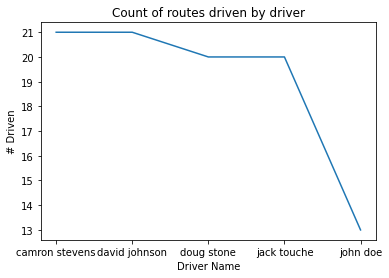

In [54]:
plt.plot(driver_counts)

plt.xlabel('Driver Name')
plt.ylabel('# Driven')

plt.title('Count of routes driven by driver')

plt.show()

As you can see using Python and Jupyter notes is a great way to disect and analyze data from Hive.  We've only begun to scratch the surface with this example.  Feel free to play around further with this notebook or try creating your own.  Once you're finished please proceed to Challenge 2!